<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/6_1_Machine_Learning_with_Tree_Based_Models_in_Python_Classification_and_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1 Machine Learning with Tree-Based Models in Python - Classification and Regression Trees

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
plt.style.use('ggplot')

## Data

In [3]:
base_url = 'https://drive.google.com/uc?id='

### Wisconson Breast Cancer diagnostic dataset

In [4]:
id = '1oqwkLiOXsHomv_Nhm4JhEUf0GQE8h1rp'
breast = pd.read_csv(base_url + id)
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Decision tree for classification

### Classification-tree

- Sequence of if-else questions about individual features
- **Objective**: infer class labels
- Able to capture non-linear relationships between features and labels
- Don't require feature scaling (i.e. Standardization)
    - Decision Trees, Random Forests, Gradient Boosted Trees (XGBoost, LightGBM, CatBoost) work by making **recursive splits** in the feature space. The **do not rely in distance calculations or gradients**, so they are **invariant to feature scaling**. The relative order is what matters, not the scale.

### Breast Cancer Dataset in 2D

In [5]:
breast_2 = breast[['radius_mean', 'concave points_mean', 'diagnosis']]
breast_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   concave points_mean  569 non-null    float64
 2   diagnosis            569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 13.5+ KB


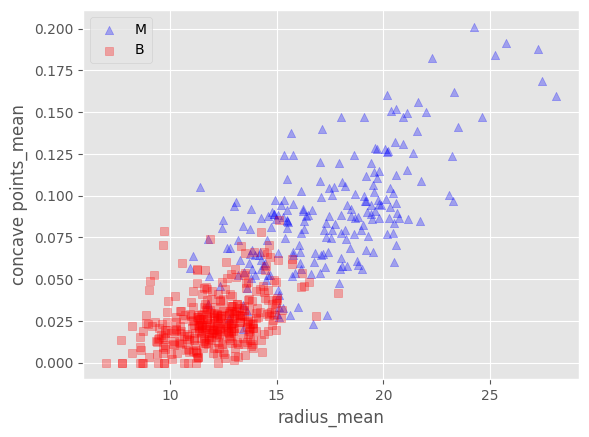

In [6]:
colors = ['blue', 'red']
markers = ['^', 's']
for i, diagnosis in enumerate(['M', 'B']):
    data = breast_2[breast_2['diagnosis'] == diagnosis]
    plt.scatter(data['radius_mean'],
                data['concave points_mean'],
                c=colors[i],
                marker=markers[i],
                alpha=0.3, label=diagnosis)

plt.legend()
plt.xlabel('radius_mean')
plt.ylabel('concave points_mean')
plt.show()

### Decision-tree Diagram

In [7]:
breast_2['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [8]:
breast_2['diagnosis'] = breast_2['diagnosis'].map({'M': 1, 'B': 0})
breast_2.head()

<ipython-input-8-9cebcd0d392a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_2['diagnosis'] = breast_2['diagnosis'].map({'M': 1, 'B': 0})


,radius_mean,concave points_mean,diagnosis
0,17.99,0.14710,1
1,20.57,0.07017,1
2,19.69,0.12790,1
3,11.42,0.10520,1
4,20.29,0.10430,1


In [9]:
X = breast_2.drop('diagnosis', axis=1)
y = breast_2['diagnosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 2), (114, 2), (455,), (114,))

In [11]:
d_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

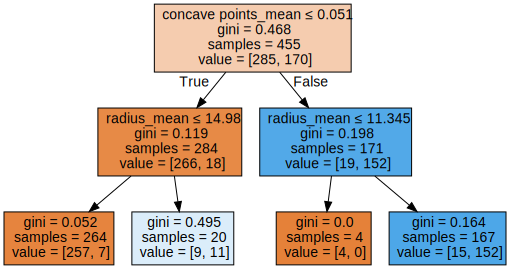

In [12]:
graphviz.Source(
    export_graphviz(d_tree,
                    out_file=None,
                    feature_names = X.columns,
                    filled=True,
                    special_characters=True)
)

In [13]:
y_pred = d_tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [14]:
((y_pred == y_test).sum() / len(y_pred)).item()

0.9035087719298246

In [15]:
accuracy_score(y_test, y_pred)

0.9035087719298246

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


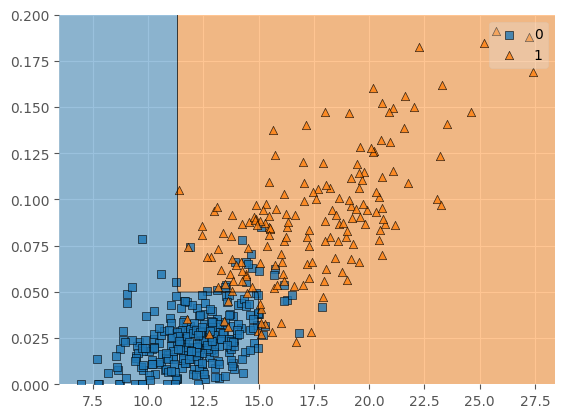

In [16]:
plot_decision_regions(X_train.values, y_train.values, clf=d_tree)
plt.ylim(0, 0.2)
plt.show()

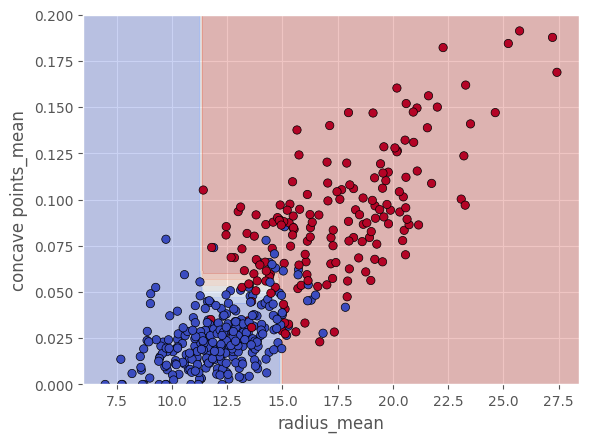

In [17]:
disp = DecisionBoundaryDisplay.from_estimator(
    d_tree,
    X_train,
    response_method='predict',
    alpha=0.3,
    cmap='coolwarm'
)
disp.ax_.scatter(X_train['radius_mean'], X_train['concave points_mean'], c=y_train, edgecolor='k', cmap='coolwarm')
plt.ylim(0, 0.2)
plt.show()

- Note that CART (Classification and Regression Trees) don't have a straight line decision boundary, it produces rectangular decision regions in the feature space
    - That is because, at each split made by the tree, only one feature is involved